In [18]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
import cv2
import random
%matplotlib inline
# from matplotlib.font_manager import FontProperties
# from numpy.core.fromnumeric import mean  # 字体管理器

# 设置汉字格式
# font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)

In [19]:
def knn(inX, dataSet, labels, k):
    inX = np.array(inX)
    dataSet = np.array(dataSet)
    labels = np.array(labels)

    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistance = sqDiffMat.sum(axis=1)
    distance = sqDistance ** 0.5
    sorteedDisttTndices = distance.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sorteedDisttTndices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(
        classCount.items(), key=lambda d: d[1], reverse=True)
    return sortedClassCount[0][0]

In [20]:
def pca(date_mat, max_rank=200):
    date_mat = np.float32(np.mat(date_mat))
    mean_value = np.mean(date_mat, axis=0)
    mean_removed = date_mat - mean_value
    cov_mat = np.cov(mean_removed, rowvar=0)
    eig_vals, eig_vects = np.linalg.eig(cov_mat)
    sort_vals = np.argsort(eig_vals)
    select_vals = sort_vals[: -(max_rank + 1): -1]
    select_vects = eig_vects[:, select_vals]
    lowD = mean_removed * select_vects
    return lowD, select_vects, mean_value

In [21]:
def loadData(test_image_path, data_path="orl_faces"):
    train_data = []
    train_lable = []
    test_data = []
    test_data.append(loadImage(test_image_path))
    for i in range(1, 41):
        train_path = data_path + "/s" + str(i)
        for j in range(1, 11):
            train_image_path = train_path + "/" + str(j) + ".pgm"
            if test_image_path == train_image_path:
                continue

            train_data.append(loadImage(train_image_path))
            train_lable.append(train_image_path)
    return train_data, train_lable, test_data

In [22]:
def loadImage(image_path):
    image = cv2.imread(image_path, -1)
    image = cv2.resize(image, None, fx=0.2, fy=0.2)
    image = image.flatten()
    return image

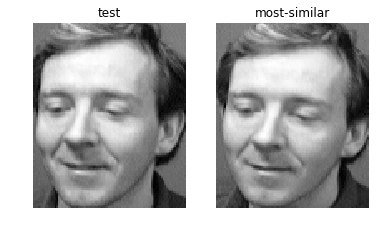

In [23]:

person = random.randint(1, 40)
picture = random.randint(1, 10)
test_face = "orl_faces/s" + str(person) + "/" + str(picture) + ".pgm"

train_data, train_lable, test_data = loadData(test_face)
lowD, select_vects, mean_value = pca(train_data)
test_data -= mean_value
test_data = np.mat(test_data) * np.mat(select_vects)
best_match = knn(test_data, lowD, train_lable, 1)

image = cv2.imread(test_face, -1)
image2 = cv2.imread(best_match, -1)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("test")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image2, cmap="gray")
plt.title("most-similar")
# 隐藏坐标系
plt.axis('off')
# 展示图片
plt.show()
